In [140]:
import numpy as np
from scipy import signal
from scipy import fftpack
from scipy.io import wavfile
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [141]:
def calculate_pad_size(signal_length, window_width, window_offset):
    useful_space = signal_length % window_offset
    return int(window_width - useful_space) if useful_space != 0 else window_width - window_offset

def extract_overlapping_frames_from_signal(signal, window_width, window_offset):
    signal_length = signal.shape[-1]
    # We fill the signal to ensure the last frame has the appropriate length
    padding_needed = calculate_pad_size(signal_length, window_width, window_offset)
    padded_signal = np.concatenate(
        (
            signal,
            np.zeros(padding_needed)
        )
    )
    initial_frame_index = np.tile(
        np.arange(0, signal_length, window_offset),
        (window_width, 1)
    ).T
    consecutive_indexes_to_add = np.tile(
        np.arange(0, window_width),
        (initial_frame_index.shape[0], 1)
    )
    frame_indexes = initial_frame_index + consecutive_indexes_to_add

    return padded_signal[frame_indexes]

def replace_zeros_with_almost_zero(signal):
    """
    This function replaces all zeros in a nd array with the non-zero smallest value representable
    :param signal:
    :return:
    """
    return np.where(signal == 0, np.finfo(float).eps, signal)

def safe_log(signal):
    """
    Execute a safe log operation replacing all ceros with almost zeros
    :param signal: 
    :return: 
    """
    return np.log(replace_zeros_with_almost_zero(signal))

hamming = signal.windows.hamming


def apply_window_function_to_frames(frames, window_function=hamming):
    if len(frames.shape) != 2:
        raise ValueError('This functions requires a 2D array')
    window_values = window_function(frames.shape[1])
    return np.apply_along_axis(lambda x: x * window_values, 1, frames)


In [142]:

frequency, signal = wavfile.read("male_a_spa.wav")
signal = signal[:,0]

In [143]:
signal.shape

(16043,)

In [144]:
frequency

16000

In [175]:
window_width = int(frequency * 0.025)
window_offset = int(frequency * 0.01)
frames = extract_overlapping_frames_from_signal(signal, window_width, window_offset)
windowed_frames = apply_window_function_to_frames(frames)
windowed_frames_with_fourier_transform = fftpack.rfft(frames)
absolute_value_frames = np.absolute(windowed_frames_with_fourier_transform)
power_of_fft_frames = absolute_value_frames**2
windowed_frames_with_fourier_transform=power_of_fft_frames

In [176]:
windowed_frames_with_fourier_transform.shape

(101, 400)

In [177]:
cmap=get_cmap("coolwarm")

In [178]:
time_range = np.arange(0,windowed_frames_with_fourier_transform.shape[0])
time_range.shape

(101,)

In [179]:
frequency_range = np.arange(0,windowed_frames_with_fourier_transform.shape[1])
frequency_range.shape

(400,)

In [180]:
spectrogram = windowed_frames_with_fourier_transform.T

In [181]:
time_range= time_range.astype('float64')
time_range *=  (signal.shape[0]/frequency)/time_range.shape[0]

In [182]:
frequency_range = frequency_range.astype('float64')
frequency_range *= (frequency/2)/frequency_range.shape[0]

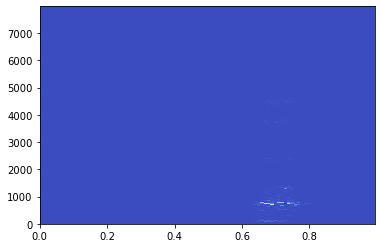

In [183]:

plt.pcolormesh(
    time_range,
    frequency_range, 
    spectrogram, 
    cmap=cmap)

In [184]:
peak = np.argwhere(time_range == time_range[(time_range>0.7)][0])
peak

array([[71]])

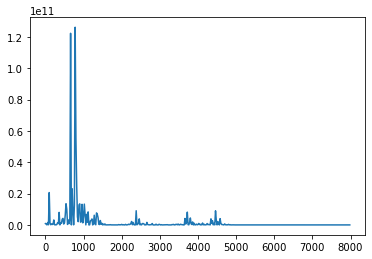

In [185]:
plt.plot(frequency_range, spectrogram.T[peak[0][0]])

In [159]:
spectrogram[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.21558810e-02, 1.71044218e+01, 6.79621916e+03, 4.38782143e+04,
       8.90129216e+04, 8.79508665e+04, 2.67184666e+05, 1.85816901e+05,
       3.77593460e+05, 3.60110402e+05, 4.46319530e+05, 8.25260046e+05,
       5.63310377e+05, 9.10453456e+05, 6.31867044e+05, 1.16603293e+06,
       8.55233063e+05, 1.20075692e+06, 1.53596471e+06, 1.47711036e+06,
       1.87495871e+06, 1.21462139e+06, 2.29703869e+06, 1.84536852e+06,
      

In [160]:
maxs_i = np.apply_along_axis(np.argmax, 0, spectrogram)

In [161]:
maxs = np.apply_along_axis(np.amax, 0, spectrogram)

In [162]:
hpf_maxs_i = (maxs>100).astype(np.int) * maxs_i

In [163]:
plt.pcolormesh(time, frequency, spectrogram, cmap=cmap)
plt.plot(time,frequency[hpf_maxs_i],"--",color="orange")
plt.axvline(time[50])
plt.xlabel('Time')
plt.ylabel('Frequency')

NameError: name 'time' is not defined